# Chapter 3: Deep Learning with ConvNets

## Deep Convolutional Neural Network -- DCNN

### Local receptive fields

If we want to preserve spatial information, then it is convenient to represent each image
with a matrix of pixels. Then, a simple way to encode the local structure is to connect a
submatrix of adjacent input neurons into one single hidden neuron belonging to the next
layer. That single hidden neuron represents one local receptive field. Note that this
operation is named convolution and it gives the name to this type of network.

Of course, we can encode more information by having overlapping submatrices. For
instance, let's suppose that the size of each single submatrix is 5 x 5 and that those
submatrices are used with MNIST images of 28 x 28 pixels. Then we will be able to generate
23 x 23 local receptive field neurons in the next hidden layer. In fact it is possible to slide the
submatrices by only 23 positions before touching the borders of the images. In Keras, the
size of each single submatrix is called stride length, and this is a hyperparameter that can
be fine-tuned during the construction of our nets.

Let's define the feature map from one layer to another layer. Of course, we can have
multiple feature maps that learn independently from each hidden layer. For instance, we
can start with 28 x 28 input neurons for processing MINST images and then recall k feature
maps of size 23 x 23 neurons each (again with a stride of 5 x 5) in the next hidden layer.

### Shared weights and bias

In Keras, if we want to add a convolutional layer with dimensionality ofthe output 32 and extension of each filter 3 x 3, we will write:

In [0]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3)))

# # or 

# model = Sequential()
# model.add(Conv2D(32, kernel_size=3, input_shape=(256, 256, 3)))

This means that we are applying a 3x3 convolution on a 256x256 image with three input channels (input filters), resulting in 32 output channels (output filters)

### Pooling layers

Aggregate the values of a submatrix into a single output value that synthetically describes the meaning assiciated with that physical region.

- Max-pooling: outputs the maximum activation as observed in the region.

In [0]:
# # define a max-pooling layer of size 2x2
# model.add(MaxPooling2D(pool_size=(2, 2)))

- Average-pooling: aggregates a region into the average values of the activations observed in that region.

## An Example of DCNN -- LeNet

In [0]:
# to define LeNet code, we use a convolutional 2D module, which is:
# keras.layers.convolutional.Conv2D(filters, kernel_size, padding='valid')

- filters: the number of convolution kernels to use (for example the dimensionality of the output)
- kernel_size: an integer or tuple/list of two integers, specifying the width
and height of the 2D convolution window (can be a single integer to specify the same value
for all spatial dimensions)
- padding:
    - same: padding is used. The output is the same size as the input
    - valid: the convolution is only computed where the input and the filter fully overlap. The output is smaller than the input.

In [0]:
# define maxpooling2d
keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))

pool_size: a tuple of two integers representing the factors by which the image is vertically and horizontally downscaled.
So (2, 2) will halve the image in each
dimension, and strides=(2, 2) is the stride used for processing.

60000 train samples
10000 test samples




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 299us/step - loss: 0.4502 - acc: 0.8643 - val_loss: 0.1639 - val_acc: 0.9493
Epoch 2/20
48000/48000 [==============================] - 14s 293us/step - loss: 0.1340 - acc: 0.9594 - val_loss: 0.1028 - val_acc: 0.9702
Epoch 3/20
48000/48000 [==============================] - 14s 300us/step - loss: 0.0924 - acc: 0.9712 - val_loss: 0.0826 - val_acc: 0.9748
Epoch 4/20
48000/48000 [==============================] - 14s 295us/step - loss: 0.0730 - acc: 0.9776 - val_loss: 0.0741 - val_acc: 0.9772
Epoch 5/20
48000/48000 [==============================] - 14s 288us/step - loss: 0.0630 - acc: 0.9801 - val_loss: 0.0734 - val_acc: 0.9771
Epoch 6/20
48000/48000 [==============================] - 14s 285us/step - loss: 0.0532 - acc: 0.9832 - val_loss: 0.0621 - val_acc: 0.9817
Epoch 7/20
48000/48000

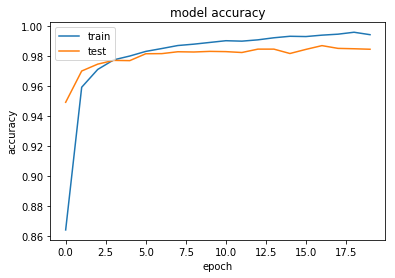

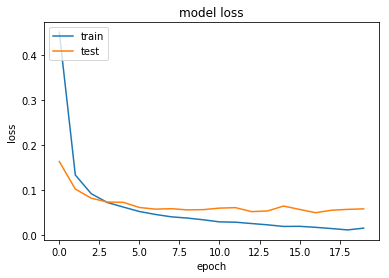

In [11]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),  dim_ordering="th"))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),  dim_ordering="th"))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Understanding the power of deep learning

Another test that we can run to better understand the power of deep learning and ConvNet
is to reduce the size of the training set and observe the consequent decay in performance.

## Recognizing CIFAR-10 Images with Deep Learning

In [16]:
#import modules 
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# CIFAR_10 is a set of 6k images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIMIZER = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train shape: ", X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# cast to float32 and normalizer
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',  
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))) 
# learn 32 convolutional filter, each with 3x3 size
# output_dim == input_dim
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
          validation_split=VALIDATION_SPLIT, verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_______________________________________________________________

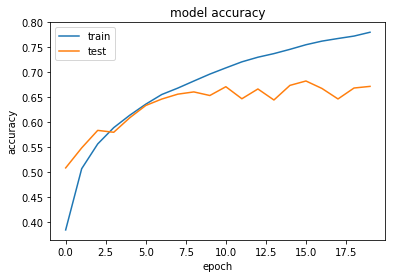

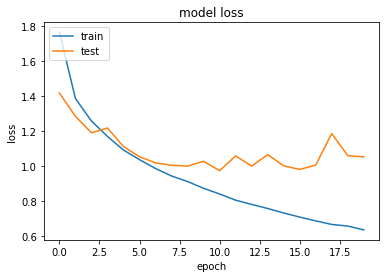

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Improving the CIFAR-10 performance with a network

In [19]:
# CIFAR_10 is a set of 6k images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIMIZER = RMSprop()

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("X_train shape: ", X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# cast to float32 and normalizer
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

# train
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
          validation_split=VALIDATION_SPLIT, verbose=VERBOSE)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
______________________________________________

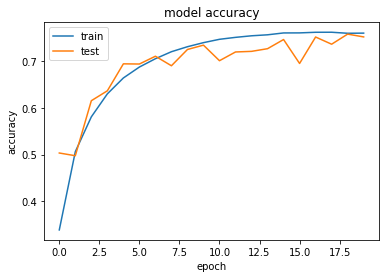

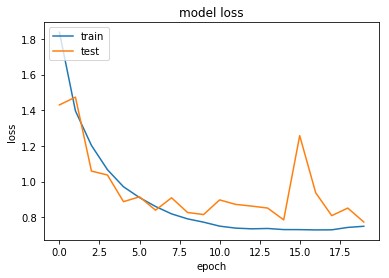

In [20]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Improving the CIFAR-10 performance with data augmentation

Another way to improve the performance is to generate more images for our training. The
key intuition is that we can take the standard CIFAR training set and augment this set with
multiple types of transformations including rotation, rescaling, horizontal/vertical flip,
zooming, channel shift, and many more.

In [23]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator

#from quiver_engine import server

import matplotlib.pyplot as plt

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network

model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# train
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

#model.fit_generator(datagen.flow(X_train, Y_train,
#                        batch_size=BATCH_SIZE),
#                        samples_per_epoch=X_train.shape[0],
#                        nb_epoch=NB_EPOCH, 
#                        verbose=VERBOSE)

#server.launch(model)


print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_34 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)      

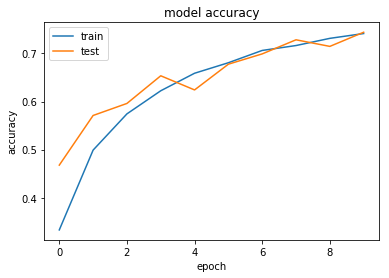

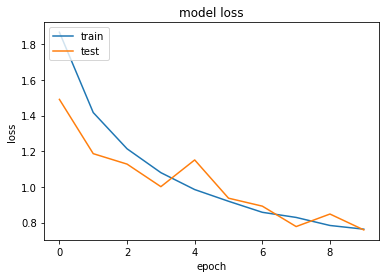

In [25]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---

## Very Deep Convolutional Networks for Large Scale Image Recognition

In [0]:
# from keras.models import Sequential
# from keras.layers.core import Flatten, Dense, Dropout
# from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.optimizers import SGD
# import numpy as np

# # define a VGG16 network
# def VGG16(weigths_path=None):
#     model = Sequential()
#     model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(256, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Conv2D(512, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(Flatten())

#     #top layer of the VGG net
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1000, activation='softmax'))

#     if weights_path:
#         model.load_weights(weights_path)

#     return model